In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install SPIEPy
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 26.1 MB/s 


In [3]:
import os
import sys
model_path = "/content/gdrive/MyDrive/defect_DL/Unet_h5_files/model.h5"

### Modify your folder pathe here:
## for your own dataset
folder= "/content/gdrive/MyDrive/defect_DL/val2021"

In [4]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Conv2DTranspose, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import tensorflow as tf
import cv2
from imgaug import augmenters as iaa

In [5]:
pos_weight=8
default_input_size = (256,256,3)

In [6]:

def create_weighted_binary_crossentropy(pos_weight):

    def weighted_binary_crossentropy(y_true, y_pred):

        # Calculate the binary crossentropy
        b_ce = K.binary_crossentropy(y_true, y_pred)

        # Apply the weights
        weight_vector = y_true * pos_weight + (1. - y_true)
        weighted_b_ce = weight_vector * b_ce

        # Return the mean error
        return K.mean(weighted_b_ce)

    return weighted_binary_crossentropy

In [7]:
model_attached = load_model(model_path,custom_objects={"weighted_binary_crossentropy":create_weighted_binary_crossentropy(pos_weight)})

In [8]:
def draw_cicle(shape,diamiter):
    '''
    Input:
    shape    : tuple (height, width)
    diameter : scalar
    
    Output:
    np.array of shape  that says True within a circle with diamiter =  around center 
    '''
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    
    center = np.array(TF.shape)/2.0
    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < (diamiter **2)
    return(TF)

def filter_circle(TFcircleIN,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    return(temp)

def inv_FFT_all_channel(fft_img):
    #img_reco = []
    # for ichannel in range(fft_img.shape[2]):
    #img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:])))
    img_reco = np.fft.ifftshift(fft_img[:,:])
    img_reco = np.fft.ifft2(img_reco)
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco)
    return(img_reco)

def returnrgb(arr):
    a=np.zeros(np.shape(arr[:,:,1]))
    arr[:,:,2]=a
    return arr


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


Image after the process of 'flatten - > fft -> low pass filter -> ifft'


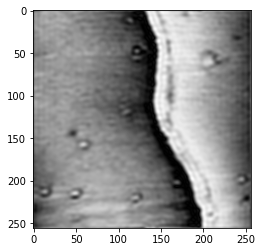

Defect counts:
Impurity(# of pixels) 2504.4622
Rough # of impurity: 3.5778030831473213
Hole(# of pixels) 4390.231
Rough # of holes: 17.560923828125


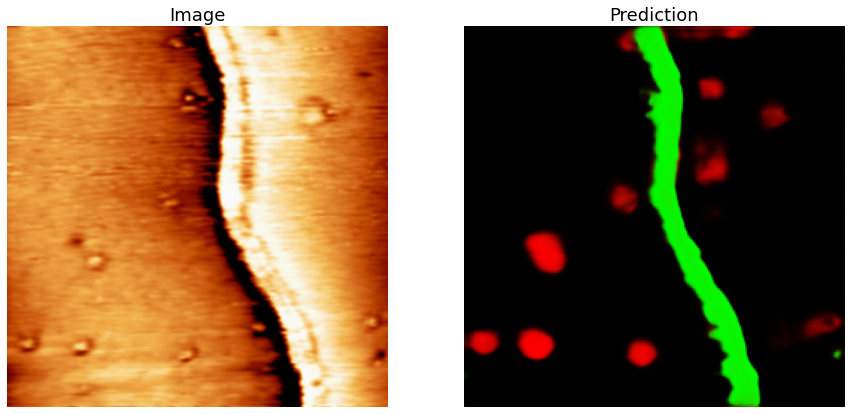

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


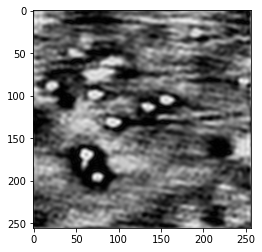

Defect counts:
Impurity(# of pixels) 8950.316
Rough # of impurity: 12.786166294642857
Hole(# of pixels) 2863.6582
Rough # of holes: 11.4546328125


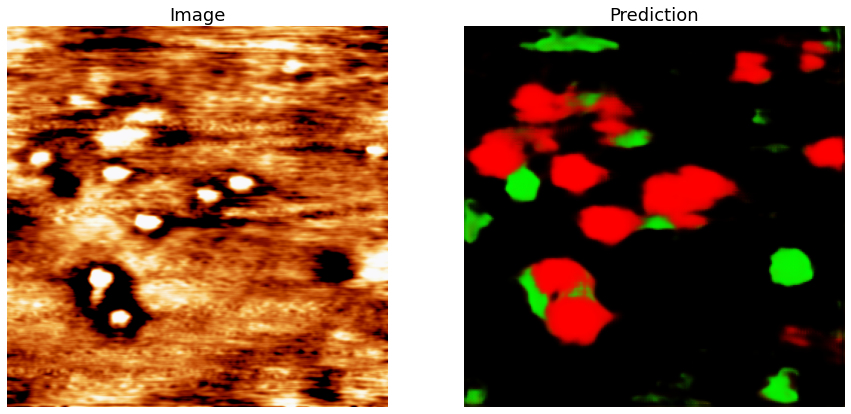

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


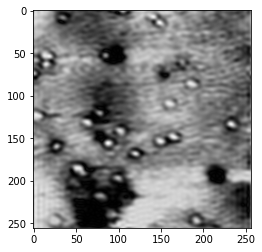

Defect counts:
Impurity(# of pixels) 9685.689
Rough # of impurity: 13.83669921875
Hole(# of pixels) 3157.3174
Rough # of holes: 12.62926953125


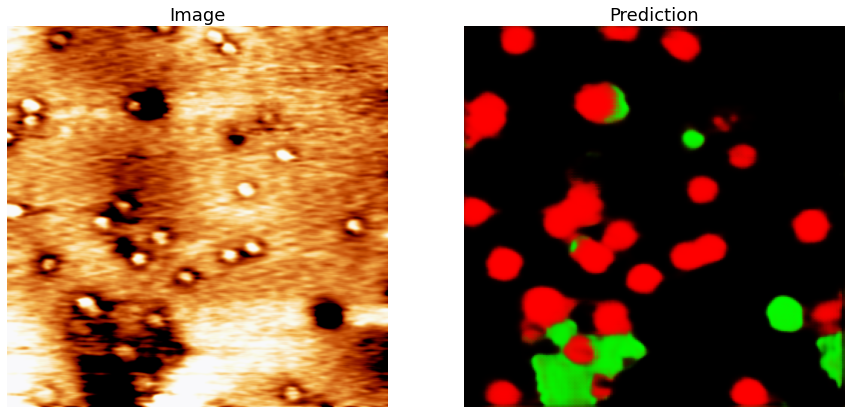

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


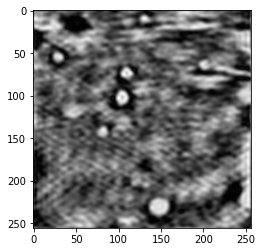

Defect counts:
Impurity(# of pixels) 6247.33
Rough # of impurity: 8.924757254464286
Hole(# of pixels) 2471.04
Rough # of holes: 9.88416015625


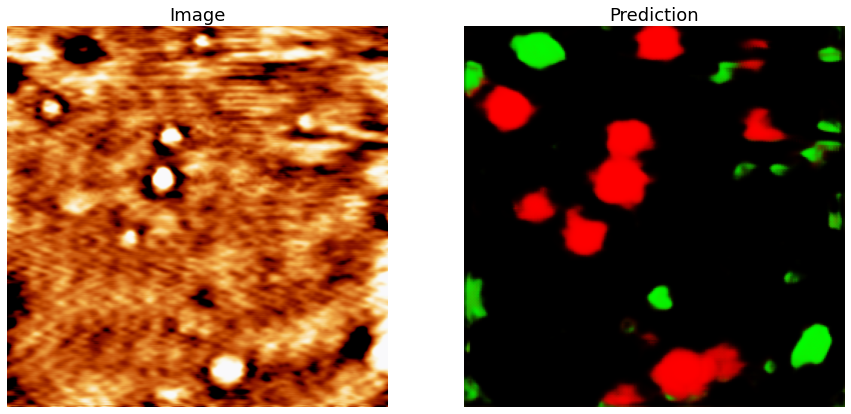

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


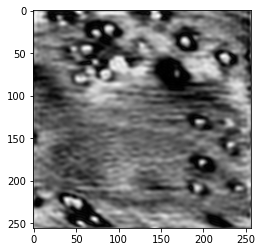

Defect counts:
Impurity(# of pixels) 11903.07
Rough # of impurity: 17.004386160714287
Hole(# of pixels) 2024.6875
Rough # of holes: 8.09875


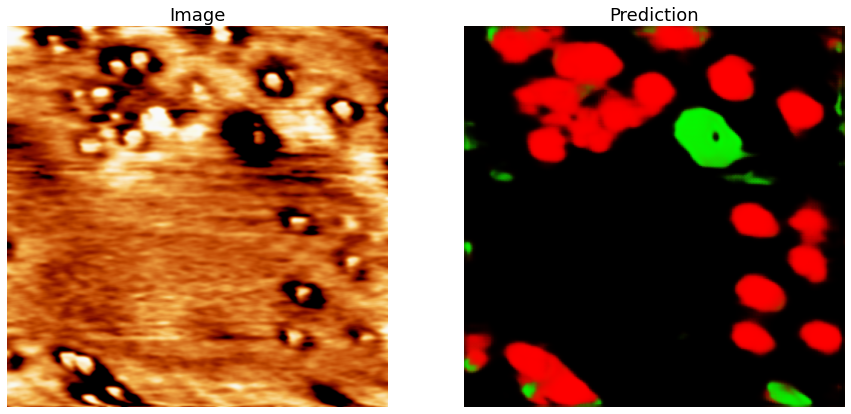

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


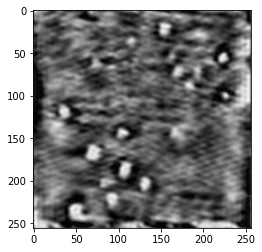

Defect counts:
Impurity(# of pixels) 12141.3955
Rough # of impurity: 17.344850725446427
Hole(# of pixels) 1136.3987
Rough # of holes: 4.5455947265625


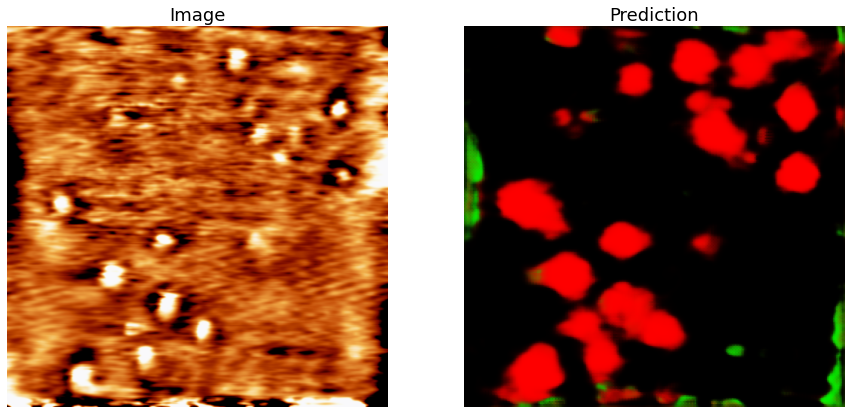

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


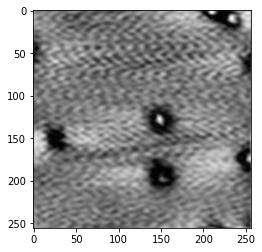

Defect counts:
Impurity(# of pixels) 2783.1543
Rough # of impurity: 3.9759347098214284
Hole(# of pixels) 630.96686
Rough # of holes: 2.523867431640625


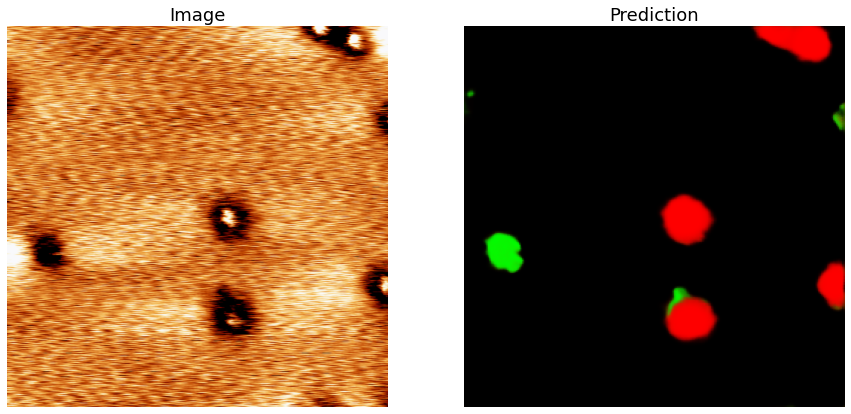

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


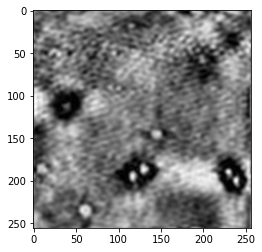

Defect counts:
Impurity(# of pixels) 5944.333
Rough # of impurity: 8.491904296875
Hole(# of pixels) 483.8952
Rough # of holes: 1.935580810546875


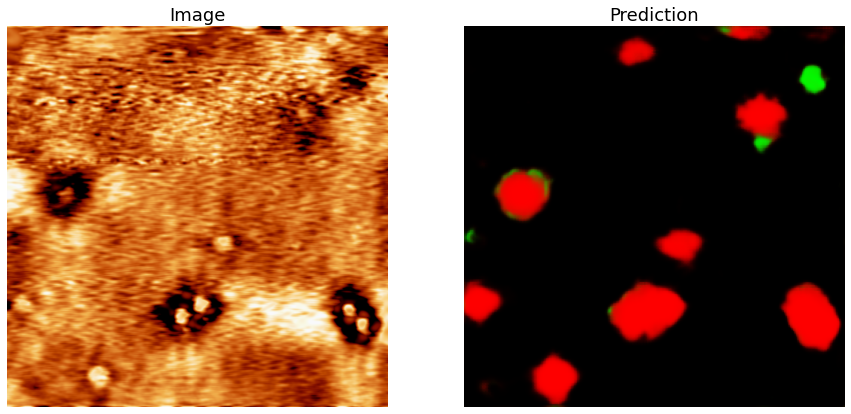

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


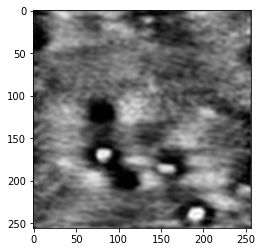

Defect counts:
Impurity(# of pixels) 4794.743
Rough # of impurity: 6.849633091517857
Hole(# of pixels) 2061.4482
Rough # of holes: 8.24579296875


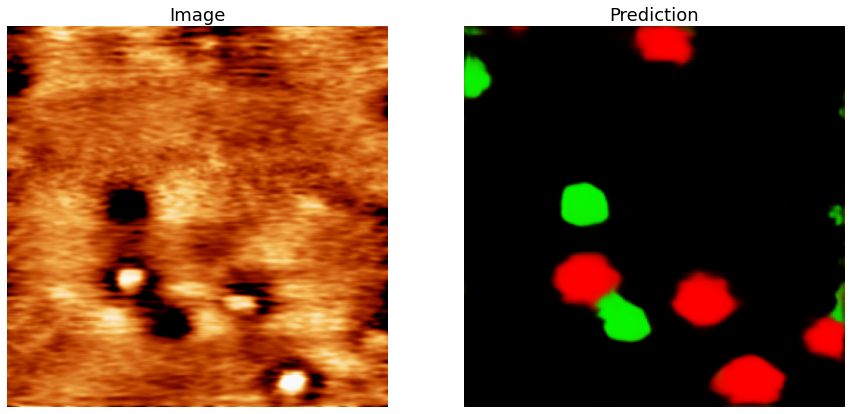

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


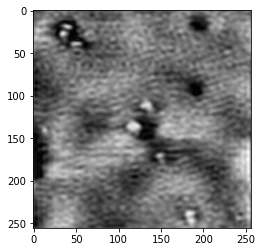

Defect counts:
Impurity(# of pixels) 4088.2085
Rough # of impurity: 5.8402978515625
Hole(# of pixels) 1030.5984
Rough # of holes: 4.1223935546875


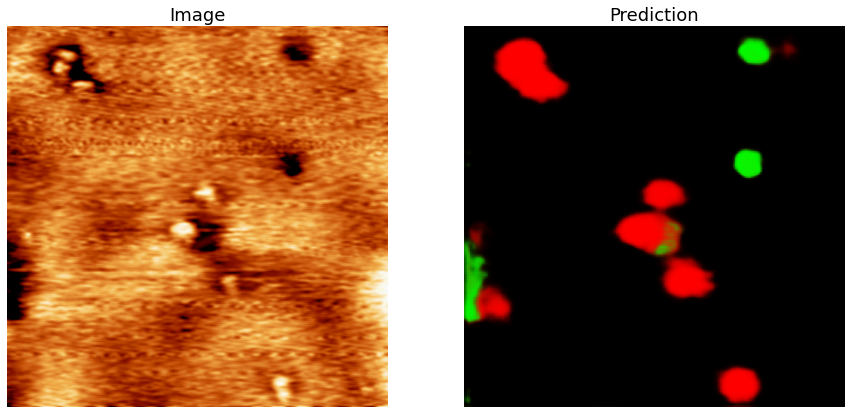

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


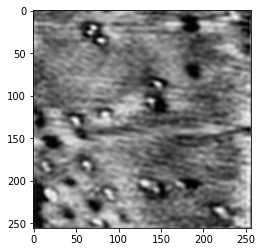

Defect counts:
Impurity(# of pixels) 7145.9307
Rough # of impurity: 10.208472377232143
Hole(# of pixels) 1585.1726
Rough # of holes: 6.3406904296875


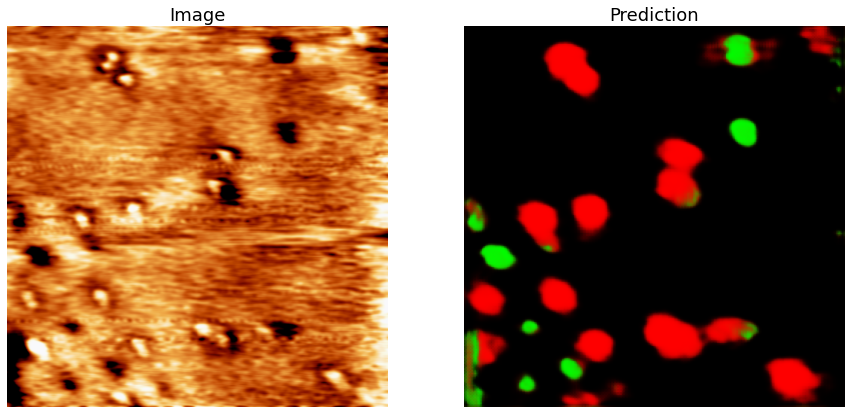

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


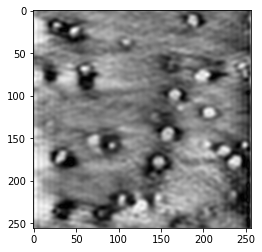

Defect counts:
Impurity(# of pixels) 11630.381
Rough # of impurity: 16.61482979910714
Hole(# of pixels) 760.6968
Rough # of holes: 3.042787109375


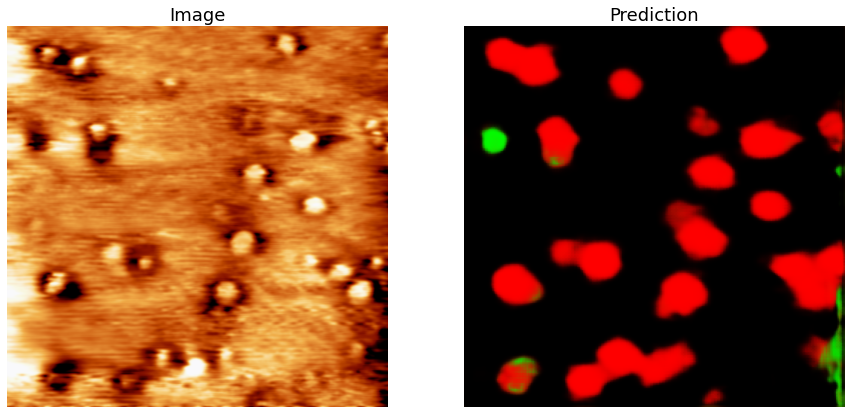

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


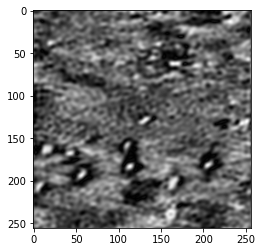

Defect counts:
Impurity(# of pixels) 7505.645
Rough # of impurity: 10.722350027901786
Hole(# of pixels) 658.0428
Rough # of holes: 2.632171142578125


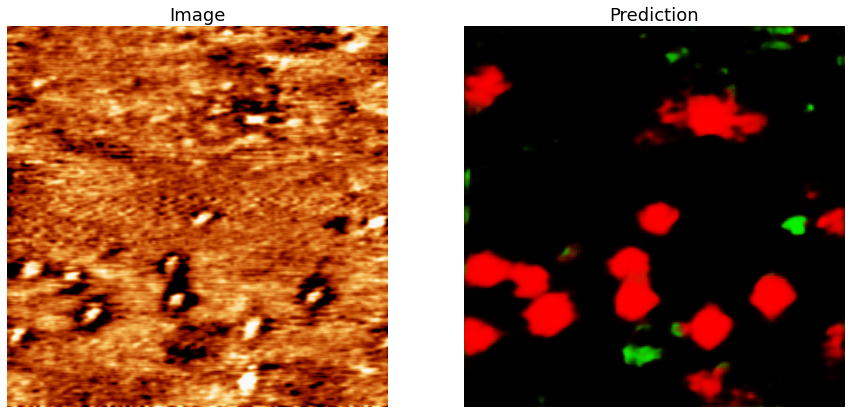

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


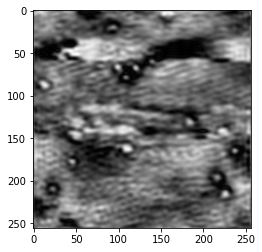

Defect counts:
Impurity(# of pixels) 7732.1064
Rough # of impurity: 11.04586635044643
Hole(# of pixels) 2758.7932
Rough # of holes: 11.0351728515625


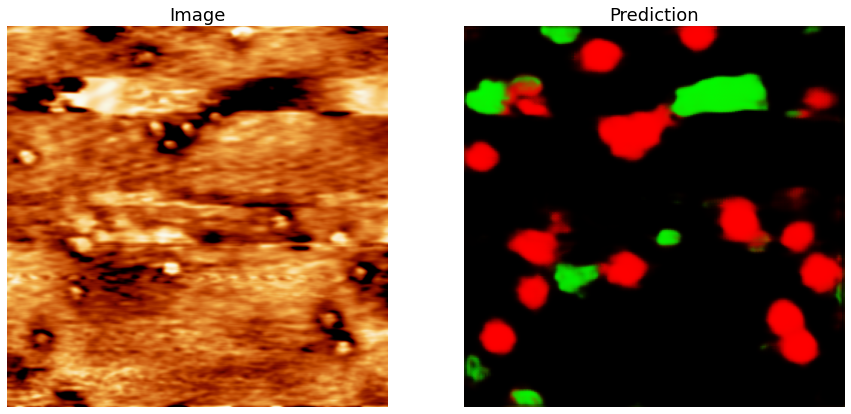

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


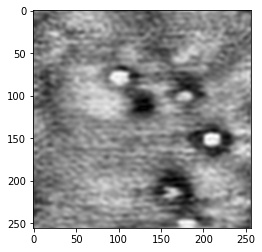

Defect counts:
Impurity(# of pixels) 4678.192
Rough # of impurity: 6.6831312779017855
Hole(# of pixels) 377.8554
Rough # of holes: 1.511421630859375


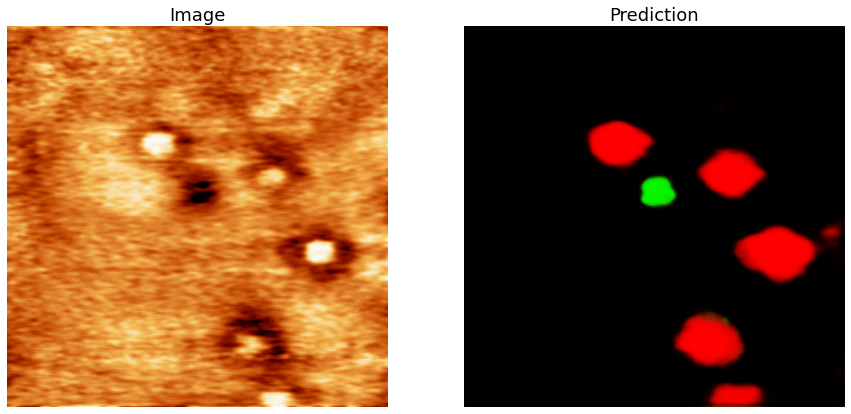

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


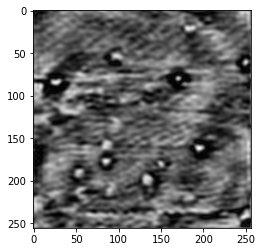

Defect counts:
Impurity(# of pixels) 7666.42
Rough # of impurity: 10.95202845982143
Hole(# of pixels) 611.31934
Rough # of holes: 2.44527734375


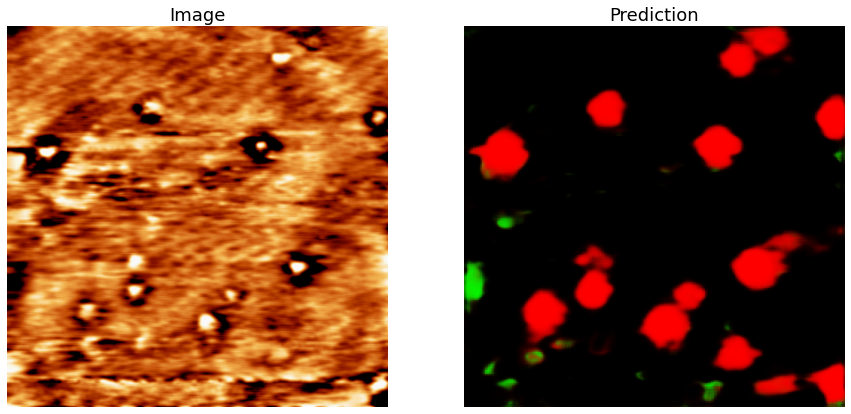

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


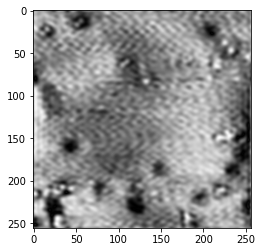

Defect counts:
Impurity(# of pixels) 3362.8042
Rough # of impurity: 4.8040059988839285
Hole(# of pixels) 1856.3467
Rough # of holes: 7.42538671875


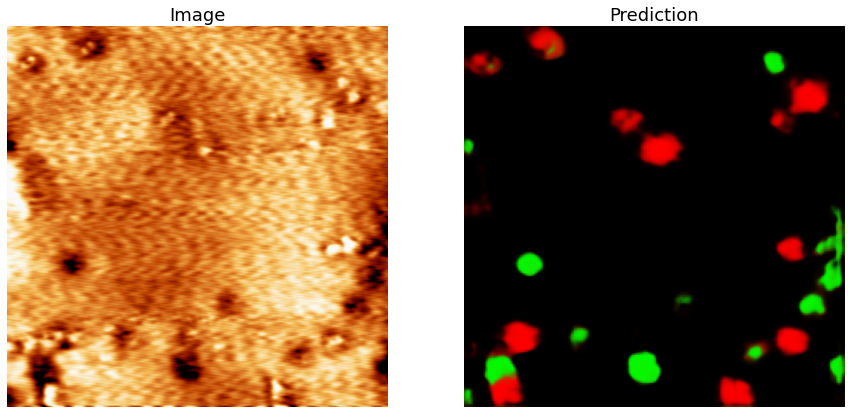

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


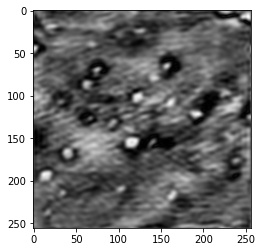

Defect counts:
Impurity(# of pixels) 10691.594
Rough # of impurity: 15.273705357142857
Hole(# of pixels) 745.1942
Rough # of holes: 2.98077685546875


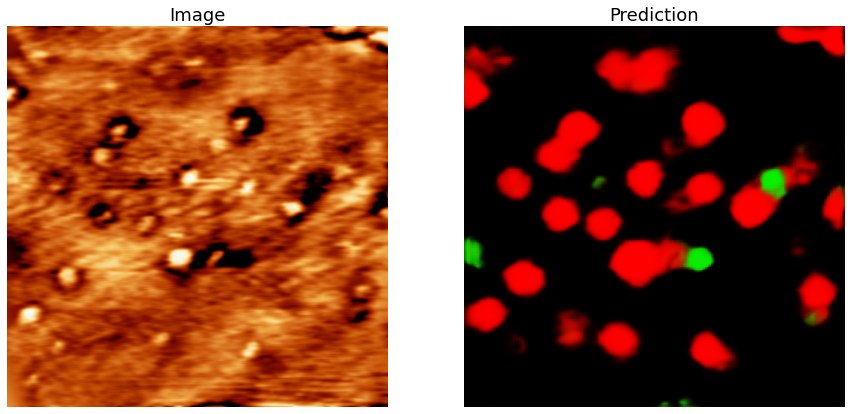

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


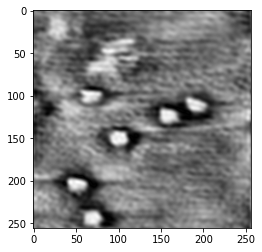

Defect counts:
Impurity(# of pixels) 7162.926
Rough # of impurity: 10.232751116071428
Hole(# of pixels) 248.66148
Rough # of holes: 0.9946459350585938


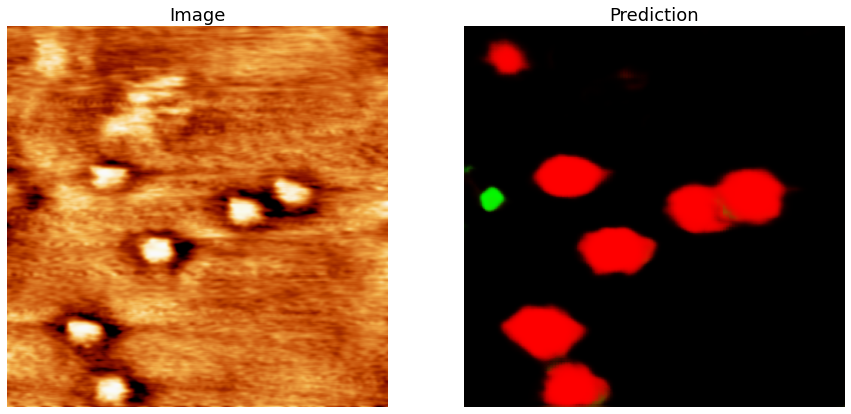

Image after the process of 'flatten - > fft -> low pass filter -> ifft'


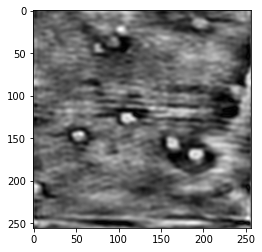

Defect counts:
Impurity(# of pixels) 6105.6313
Rough # of impurity: 8.722330496651786
Hole(# of pixels) 850.923
Rough # of holes: 3.40369189453125


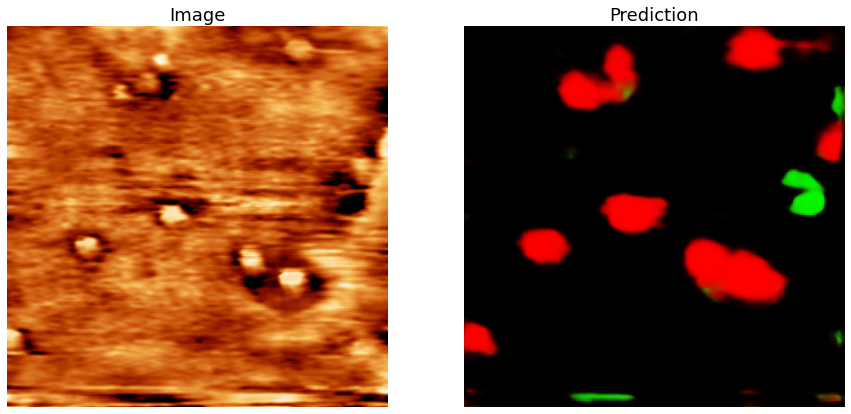

total number of impurities:  192
total number of holes:  93
total number of defects:  285


In [9]:
# (TODO) histogram
# (todo) edge detection to count the defects

# def tf_equalize_histogram(image):
#     values_range = tf.constant([0., 255.], dtype = tf.float32)
#     histogram = tf.histogram_fixed_width(tf.compat.v1.to_float(image), values_range, 256)
#     cdf = tf.cumsum(histogram)
#     cdf_min = cdf[tf.reduce_min(tf.where(tf.greater(cdf, 0)))]

#     img_shape = tf.shape(image)
    
#     pix_cnt = img_shape[-3] * img_shape[-2]
#     px_map = tf.round(tf.cast(cdf - cdf_min, tf.float32) * 255. / tf.cast(pix_cnt - 1, tf.float32))
#     px_map = tf.cast(px_map, tf.uint8)
    
#     eq_hist = tf.expand_dims(tf.gather_nd(px_map, tf.cast(image, tf.int32)), 2)
#     return eq_hist


# equalization
## ''flatten'' - > fft -> low pass filter -> ifft -> contrast
## (TODO)change it to : fft -> low pass filter -> ifft -> ''flatten'' - >  contrast
## (done) add all the # of impurities for all the images
from skimage import exposure
import glob
from scipy import ndimage, signal
from scipy import fftpack
from PIL import Image, ImageDraw
import spiepy, spiepy.demo
import numpy
from skimage import color
from skimage import io
import tensorflow_addons as tfa
import cv2
impurity = []
hole = []
cluster = []

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.4 * r + 0.2 * g + 0.4 * b
    return gray

count=0
for filename in glob.iglob(folder + '**/*.bmp',recursive = True):
  count+=1
  new_plot=plt.imread(filename)
  raw = cv2.resize(new_plot,
          dsize=default_input_size[:2],
          interpolation=cv2.INTER_CUBIC)
  #raw = rgb2gray(raw)
  raw = color.rgb2gray(raw) # converting the rgb values to grayscale
 
  img=raw
  #print("Grayscale Image")
  #plt.imshow(np.abs(img), cmap = "gray")
  plt.show()
  shape = img.shape[:]

  TFcircleIN   = draw_cicle(shape=img.shape[:],diamiter = 40) 

  fft_img = np.zeros_like(img,dtype=complex)
  #print("fft_image shape", np.shape(fft_img))
  # for ichannel in range(fft_img.shape[2]):
  fft_img[:,:] = np.fft.fftshift(np.fft.fft2(img[:,:]))

  fft_img_channel  = fft_img[:,:]
  ## circle IN
  temp1 = filter_circle(TFcircleIN,fft_img_channel)
  ## circle OUT
  fft_img_filtered_IN = np.transpose(temp1)
  img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
  raw = img_reco_filtered_IN
  print("Image after the process of 'flatten - > fft -> low pass filter -> ifft'")

  plt.imshow(np.abs(raw), cmap = "gray")
  plt.show()
  

  # adjust the contrast (調整對比度)              
  #(TODO) don't want the bright part on the images (threshold for the brightness?)
  
  raw = np.stack([raw,raw,raw], axis = -1)
  raw = np.array(tf.image.adjust_contrast(np.abs(raw), 1.3)) # add the contrat  
  
  pred = model_attached.predict(np.expand_dims(raw, 0)).squeeze()
  pred_mask = (pred >= 0.7).astype(np.float32) 
  fig, ax = plt.subplots(1, 2, figsize=(15,60)) 
  [axi.set_axis_off() for axi in ax.ravel()] 
  print("Defect counts:")
  print('=======================================')
  print("Impurity(# of pixels)", np.sum(pred[:,:,0]))
  print("Rough # of impurity:", np.sum(pred[:,:,0])/700)
  print('=======================================')
  print("Hole(# of pixels)", np.sum(pred[:,:,1]))
  print("Rough # of holes:", np.sum(pred[:,:,1])/250)
  print('=======================================')
  ax[0].imshow(new_plot)
  ax[0].set_title('Image', fontsize=18)
  ax[1].imshow(returnrgb(pred))
  ax[1].set_title('Prediction',fontsize=18)
  impurity.append(int(np.sum(pred[:,:,0])/700))
  hole.append(int(np.sum(pred[:,:,1])/300))
  plt.show()

print("total number of impurities: ", np.sum(impurity))
print("total number of holes: ", np.sum(hole))
print("total number of defects: ", np.sum(impurity)+np.sum(hole))